# Лабораторная работа №1
## Кластерный иерархический анализ на датафрейме "Econom_Cities_data"

In [85]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
matplotlib.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import os

In [86]:
from src.config import FILE_DIGIT, ENCODINGS

In [87]:
os.chdir(r"C:\Users\print\OneDrive\Рабочий стол\Data_Analysis_in_Python\DA_on_python_labs\data")

In [88]:
os.getcwd()

'C:\\Users\\print\\OneDrive\\Рабочий стол\\Data_Analysis_in_Python\\DA_on_python_labs\\data'

#### Выполнена базовая подготовка к работе


In [89]:
df = pd.read_csv(FILE_DIGIT, encoding=ENCODINGS[0], sep=';')

In [90]:
df.head(5)

,A,B,C,D,E,F,G,H,A2,B2,C2,D2,E2,F2,G2,H2
0,seven,ONE,ZERO,ONE,ZERO,ZERO,ONE,ZERO,seven,ONE,ZERO,ONE,ZERO,ZERO,ONE,ZERO
1,one,ZERO,ZERO,ONE,ZERO,ZERO,ONE,ZERO,one,ZERO,ZERO,ONE,ZERO,ZERO,ONE,ZERO
2,four,ZERO,ONE,ONE,ONE,ZERO,ONE,ZERO,four,ZERO,ONE,ONE,ONE,ZERO,ONE,ZERO
3,two,ONE,ONE,ONE,ONE,ONE,ZERO,ZERO,two,ONE,ONE,ONE,ONE,ONE,ZERO,ZERO
4,eight,ZERO,ONE,ONE,ONE,ONE,ONE,ONE,eight,ZERO,ONE,ONE,ONE,ONE,ONE,ONE


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       500 non-null    object
 1   B       500 non-null    object
 2   C       500 non-null    object
 3   D       500 non-null    object
 4   E       500 non-null    object
 5   F       500 non-null    object
 6   G       500 non-null    object
 7   H       500 non-null    object
 8   A2      500 non-null    object
 9   B2      500 non-null    object
 10  C2      500 non-null    object
 11  D2      500 non-null    object
 12  E2      500 non-null    object
 13  F2      500 non-null    object
 14  G2      500 non-null    object
 15  H2      500 non-null    object
dtypes: object(16)
memory usage: 62.6+ KB


In [92]:
df.shape

(500, 16)

По какой-то причине данные в нашей таблице дублируются. Появились лишние 8 столбцов. Избавимся от них

Также при визуальном осмотре данных я выявил, что некоторые данные записаны с дополнительными пробелами, так что для начала избавимся от них

In [93]:
df = df.astype("string").apply(lambda s: s.str.strip())

In [94]:
drop_cols = [c for c in df.columns if c.endswith("2")]
df = df.drop(columns=drop_cols)

In [95]:
df.head(5)

,A,B,C,D,E,F,G,H
0,seven,ONE,ZERO,ONE,ZERO,ZERO,ONE,ZERO
1,one,ZERO,ZERO,ONE,ZERO,ZERO,ONE,ZERO
2,four,ZERO,ONE,ONE,ONE,ZERO,ONE,ZERO
3,two,ONE,ONE,ONE,ONE,ONE,ZERO,ZERO
4,eight,ZERO,ONE,ONE,ONE,ONE,ONE,ONE


Мы подготовили наш датафрейм для дальнейшей работы, но еще лучше перевести ONE и ZERO в числовой формат, для удобной работы с числами

In [96]:
for col in df.columns:
    print(col, "->", sorted(df[col].unique()))

A -> ['eight', 'five', 'four', 'nine', 'one', 'seven', 'six', 'three', 'two', 'zero']
B -> ['ONE', 'ZERO']
C -> ['ONE', 'ZERO']
D -> ['ONE', 'ZERO']
E -> ['ONE', 'ZERO']
F -> ['ONE', 'ZERO']
G -> ['ONE', 'ZERO']
H -> ['ONE', 'ZERO']


Убедились, что никаких других значений нет

In [97]:
seg_cols = list("BCDEFGH")
Y = df['A']
X = (df[seg_cols]
       .apply(lambda s: s.str.strip())
       .replace({"ONE": "1", "ZERO": "0"})
       .astype("int8"))


In [98]:
X.head(5)

,B,C,D,E,F,G,H
0,1,0,1,0,0,1,0
1,0,0,1,0,0,1,0
2,0,1,1,1,0,1,0
3,1,1,1,1,1,0,0
4,0,1,1,1,1,1,1


In [99]:
Y.head(5)

0    seven
1      one
2     four
3      two
4    eight
Name: A, dtype: string

In [145]:
X_2 = X.copy()

Теперь данные нормализованы и можно приступать к кластеризации

In [100]:
Z = linkage(X, method='ward', metric='euclidean')
print(type(Z))
print(Z.shape)
print(Z[:10])

<class 'numpy.ndarray'>
(499, 4)
[[  0.  13.   0.   2.]
 [  1.   5.   0.   2.]
 [  2.  18.   0.   2.]
 [ 42. 324.   0.   2.]
 [ 64. 210.   0.   2.]
 [  4. 394.   0.   2.]
 [ 28. 501.   0.   3.]
 [  6.  22.   0.   2.]
 [  7. 142.   0.   2.]
 [  8.  32.   0.   2.]]


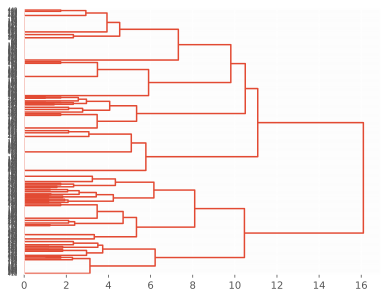

In [101]:
dn = dendrogram(Z,
                color_threshold=-1,
                labels=df.index.tolist(),
                orientation='right'
                )

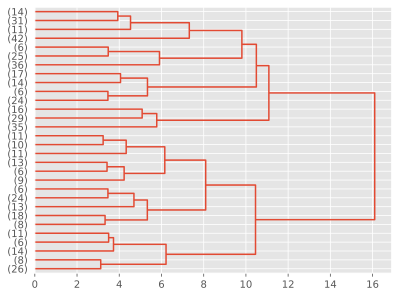

In [102]:
dn = dendrogram(Z,
                color_threshold=-1,
                labels=df.index.tolist(),
                orientation='right',
                truncate_mode='lastp',
                p=30
                )

Воспользуемся графиком "Каменистая осыпь"

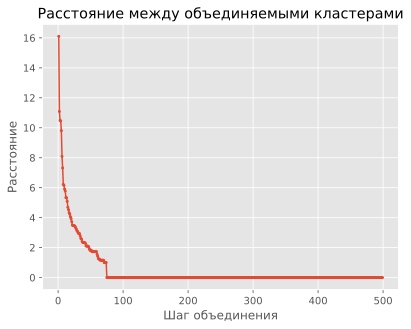

In [103]:
dist = Z[:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist_rev) + 1)
plt.plot(idxs, dist_rev, marker='o', markersize=2)
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние');

Очень много нулевых значений, избавимся от них

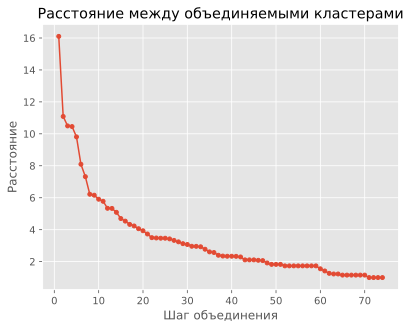

In [104]:
dist = Z[:, 2]
dist_rev = list(filter(lambda x: x > 0, dist[::-1]))
idxs = range(1, len(dist_rev) + 1)
plt.plot(idxs, dist_rev, marker='o', markersize=4)
#plt.yticks(np.arange(min(dist_rev[::-1]), max(dist_rev[::-1])+1, 3))
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние');

Видел резкий подъем в точке под номером 8, поэтому зададим высоту равную 6.9

In [105]:
h = 6.9

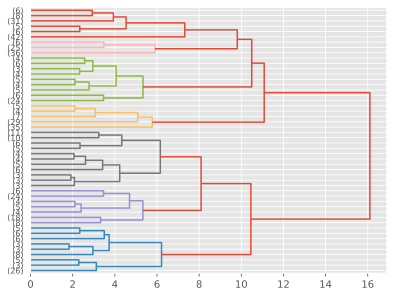

In [106]:
dn = dendrogram(Z,
                color_threshold=h,
                labels=df.index.tolist(),
                orientation='right',
                truncate_mode='lastp',
                p=50
                )

Добавим в наш набор данных информацию о кластерах

In [109]:
X['cluster'] = fcluster(Z, h, criterion='distance')

In [110]:
X.head()

,B,C,D,E,F,G,H,cluster
0,1,0,1,0,0,1,0,2
1,0,0,1,0,0,1,0,2
2,0,1,1,1,0,1,0,1
3,1,1,1,1,1,0,0,5
4,0,1,1,1,1,1,1,1


In [118]:
X.groupby('cluster').size()

cluster
1    65
2    69
3    60
4    80
5    61
6    67
7    42
8    56
dtype: int64

In [119]:
X.groupby('cluster').mean()

,B,C,D,E,F,G,H
cluster,,,,,,,
1,0.015385,0.907692,0.784615,0.953846,0.261538,0.907692,0.384615
2,0.507246,0.188406,1.000000,0.000000,0.115942,0.913043,0.057971
3,0.900000,0.600000,0.533333,0.633333,0.383333,0.983333,0.100000
4,1.000000,0.800000,0.000000,1.000000,0.475000,0.950000,1.000000
5,0.836066,0.344262,0.754098,0.983607,0.754098,0.000000,0.885246
6,1.000000,0.955224,1.000000,0.537313,1.000000,0.910448,1.000000
7,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
8,0.803571,0.000000,1.000000,0.803571,0.196429,1.000000,1.000000


In [121]:
X["cluster"].value_counts().sort_index()

cluster
1    65
2    69
3    60
4    80
5    61
6    67
7    42
8    56
Name: count, dtype: int64

In [122]:
ct = pd.crosstab(X["cluster"], df["A"])
ct

A,eight,five,four,nine,one,seven,six,three,two,zero
cluster,,,,,,,,,,
1,5,5,40,3,3,0,4,2,0,3
2,0,0,1,1,29,35,0,0,0,3
3,6,6,7,5,4,11,9,8,0,4
4,2,33,0,6,0,0,32,2,5,0
5,6,4,3,5,1,0,4,2,35,1
6,33,1,0,1,0,1,1,1,3,26
7,4,5,0,27,0,0,0,5,0,1
8,2,0,1,7,6,1,0,35,0,4


1) Кластер 1 - преобладает цифра 4
2) Кластер 2 - топ 1 - цифра 7, топ 2 - цифра 1. Кластер включает в себя сразу два числа. Скорее всего это связано с тем, что эти цифры достаточно похожи друг на друга.
3) Кластер 3 - неявных кластер, результаты разбросаны. Нет явного претендента.
4) Кластер 4 - два практически равных кандидата 5 и 6. Ситуация похожа на первый кластер, числа очень похожи друг на друга, поэтому не получилось явно разбить на кластеры.
5) Кластер 5 - кластер в котором преобладает цифра 2
6) Кластер 6 - класс 8 и 0. аналогичная ситуация. числа похожи
7) Кластер 7 - кластер числа 9.
8) Кластер 8 - кластер числа 3.

Количество кластеров получилось меньше, чем должно быть. + у нас есть один неявный кластер.

In [146]:
Z = linkage(X_2, method='ward', metric='euclidean')